# 서울시에서 일어나는 범죄와 체감 안전도
: 강남3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [120]:
import pandas as pd
import json

In [121]:
# 범죄율 데이터 가져오기
crime_anal_police =  pd.read_csv('data/crime_in_Seoul.csv' , encoding = 'cp949' ) # 한글 인코딩 utf-8 / enc-kr / cp949 (cp949는 enc-kr의 확장버전)
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [122]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [123]:
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [124]:
# 주소 데이터 가져오기
police_address = pd.read_csv('data/SeoulPoliceAddress.csv')
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [125]:
station_name = list('서울' + crime_anal_police['관서명'].str[:-1] + '경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [126]:
# for 문 사용하는 방법
station_name = []
for name in crime_anal_police['관서명']:
    # print('서울' + name[:-1] + "경찰서" )
    station_name.append('서울' + name[:-1] + "경찰서" )

station_name[:10]

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서']

In [127]:
# 경찰서 갯수 확인
len(station_name)

31

In [128]:
len(police_address)
# 갯수 일치

31

In [129]:
police_address['lng'] = 0 # 경도
police_address['lat'] = 0 # 위도

In [130]:
# top 10 위도 경도
# 네이버 API사용
# url 경로만 바꿔서 사용하면 될것임 
import urllib.request

# https://console.ncloud.com/naver-service/application 에서 클라이언트 아이디, 시크릿 값 가져오기 
client_id = '345bnyc1cf'
client_secret = 'otoFCXOpzjknUtnDPH6YfkyhYwCS2WNapc2fNg6Q'

for i , name in enumerate(police_address['주소']):
    try:
        encText = urllib.parse.quote(name)
        url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
        request = urllib.request.Request(url)
        request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
        request.add_header("X-NCP-APIGW-API-KEY", client_secret)

        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if rescode == 200:
            response_body = response.read()
            enText = response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)

        data = json.loads(enText)

        police_address['lng'].iloc[i] = data['addresses'][0]['x']
        police_address['lat'].iloc[i] = data['addresses'][0]['y']
    except:
        pass


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [131]:
sum(police_address['lng']==0) # 0 
police_address.head(10)

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,126.9896139,37.5635144
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,126.9849292,37.5755322
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,126.9735627,37.5548186
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,126.9667851,37.5649018
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,126.9989318,37.5718764
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24,126.9677732,37.5412134
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170,127.0160835,37.5899114
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29,127.0457643,37.5851004
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183,126.9539447,37.5510175
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608,126.9009426,37.5258476


In [132]:
police_address.to_csv('data/SeoulPoliceAddress_latlng.csv' , index = False)

In [133]:
# 2개의 File에 경찰관서가 동일한 이름인지 확인
len(station_name == police_address['경찰관서']) # 글자와 순서가 동일하다

31

In [134]:
# 경찰서 주소 데이터에서 구 뽑아내기
# for 문 사용 1
gulist = []
for i in range(len(police_address)):
    gulist.append(police_address.주소.str.split(' ')[i][1])

gulist

# 경찰서 구 데이터 범죄율 데이터에 추가하기
crime_anal_police['구별'] = gulist
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [135]:
# 경찰서 주소 데이터에서 구 뽑아내기
# for 문 사용 2
[region.split()[1] for region in police_address['주소']]

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [136]:
# 경찰서 주소 데이터에서 구 뽑아내기
# 주소중 2번째 단어의 끝에 '구' 이름만 출력하기
gu_name = []
for name in police_address['주소']:
    temp = name.split() # 주소를 공백 기준으로 나누기
    temp_gu =  [gu for gu in temp if gu[-1] == '구'][0] # 구로 끝나는 문자열만  temp_gu에 저장, [0]를 안해주면 리스트로 들어가게 된다. [0]을 해줌으로서 데이터만 뽑아오는것
    gu_name.append(temp_gu)

crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [137]:
len(gu_name)

31

In [138]:
# 리스트에서 중복값 제거하고 갯수 볼 때 
# 리스트는 unique는 사용이 불가하다
len(set(gu_name))
# 25개 구 , 2개의 구에는 경찰서가 없나? 

23

In [139]:
# 관서명과 구별 이름 확인
crime_anal_police[['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [140]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재 금천서는 금천구로 편성되어 있음
crime_anal_police[crime_anal_police['관서명']=='금천서']
crime_anal_police.loc[crime_anal_police['관서명']=='금천서' , ['구별']] = '금천구'

# DataSet을 보면 강서서가 양천구로 편성되어 있는데 현재 강서서는 강서구로 편성되어 있음
crime_anal_police[crime_anal_police['관서명']=='강서서']
crime_anal_police.loc[crime_anal_police['관서명']=='강서서' , ['구별']] = '강서구'


In [141]:
# 확인하기
len(crime_anal_police['구별'].unique())

25

In [142]:
# csv 저장하기
crime_anal_police.to_csv('data/Seoul_crime_include_gu_name.csv' , index= False)

> 구별로 범죄안전도를 보기 위한 것이기 때문에   
> 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야 한다. 

In [143]:
len(crime_anal_police)

31

### 구별로 데이터를 정리한다

In [144]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [145]:
# 데이터에 , 없애고 숫자로 형 변환 하기
namelist = ['절도 발생','절도 검거','폭력 발생','폭력 검거']
for name in namelist:
    crime_anal_police[name] = crime_anal_police[name].str.replace(',' , '').astype(int)
    
crime_anal_police.head() 

crime_anal_police.info() # int 형태로 변환 되었다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [146]:
import numpy as np

In [147]:
# 구별로 정리한 데이터 만들기
crime_anal = pd.pivot_table(crime_anal_police, index='구별' , aggfunc= np.sum )
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [148]:
# 검거율 계산해서 컬럼 추가하기
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100
crime_anal.head()
# 전 해에 발생한 사건을 다음해에 검거하면 검거율이 100% 보다 높게 나올 수 있다.

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [149]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다

In [150]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다.
namelist = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for name in namelist:
    crime_anal.loc[crime_anal[name] > 100 , name] = 100.0

In [151]:
crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [152]:
# Column 이름 변경하기
crime_anal.columns = ['강간','강도', '살인','절도','폭력','강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


# 데이터의 정규화
- 강도와 살인은 2자리수이나 절도와 폭력은 4자리
- 각각의 범죄 할생 건수를 비슷한 범위에 놓고 비교 하는 것이 편리
각 항목의 값을 최대 

# 머신러닝 모듈 확인하기


In [153]:
from sklearn import preprocessing

In [154]:
# 정규화를 진행할 컬럼 설정
cols = ['강간','강도', '살인','절도','폭력']


In [155]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[cols].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [156]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [157]:
x_xcaled = min_max_scaler.fit_transform(x.astype(float))
x_xcaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [158]:
crime_anal_norm = pd.DataFrame(x_xcaled, columns=cols, index=crime_anal.index)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [159]:
cols2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[cols2] = crime_anal[cols2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 상관성 확인

In [160]:
result_CCTV = pd.read_csv('data/CCTV_Result.csv', index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [161]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [162]:
crime_anal_norm['범죄'] = crime_anal_norm['강간'] + crime_anal_norm['강도'] + crime_anal_norm['살인'] + crime_anal_norm['절도'] + crime_anal_norm['폭력']
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [163]:
crime_anal_norm['검거'] = crime_anal_norm['강간검거율'] + crime_anal_norm['강도검거율'] + crime_anal_norm['살인검거율'] + crime_anal_norm['절도검거율'] + crime_anal_norm['폭력검거율']

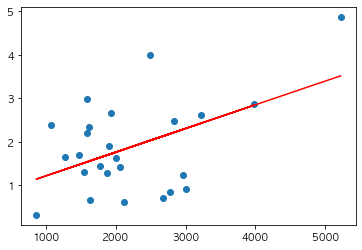

In [164]:
# scatter plot
import matplotlib.pyplot as plt
# linear regression
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 생성
model = LinearRegression()
# 학습 데이터로 모델 학습
model.fit(crime_anal_norm[['CCTV']], crime_anal_norm['범죄'])
# 회귀식 계산
y_pred = model.predict(crime_anal_norm[['CCTV']])
# 그래프 그리기
plt.scatter(crime_anal_norm['CCTV'], crime_anal_norm['범죄'])
plt.plot(crime_anal_norm['CCTV'], y_pred, color='red')
plt.show()

---
## Seaborn을 활용한 시각화

In [165]:
import seaborn as sns
# 폰트 Applegothic
plt.rc('font', family='AppleGothic')


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


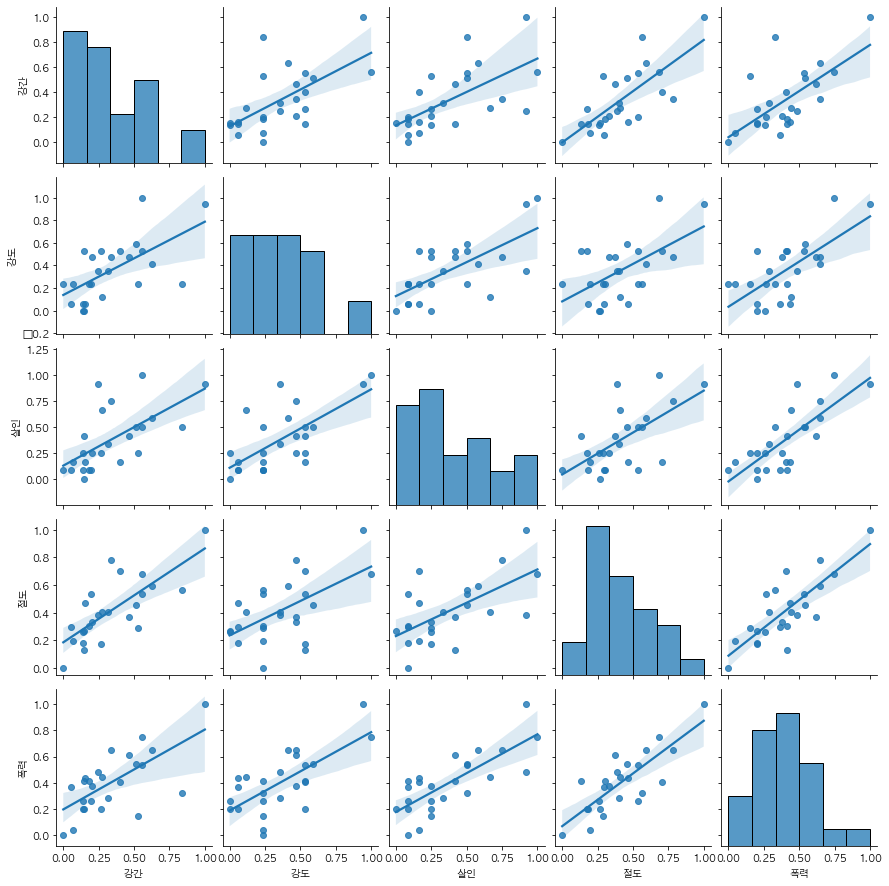

In [166]:
# 강간, 강도, 살인, 절도, 폭력 상관관계 확인
sns.pairplot(crime_anal_norm, vars=['강간', '강도', '살인', '절도', '폭력'], kind='reg')

### CCTV와 살인, 강도에 대한 그래프

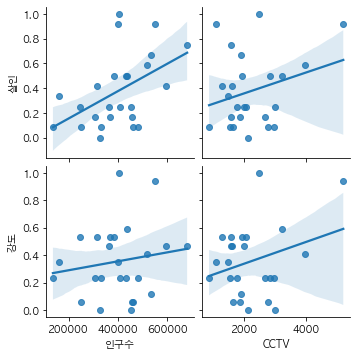

In [167]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수', 'CCTV'],
    y_vars=['살인', '강도'],
    kind='reg'
)

> 인구수가 증가하면 강도와 살인 발생도 증가한다.   
> 특히, 강도보다는 살인 발생수가 훨씬 많이 증가한다.   
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다.   
> 따라서 CCTV가 없을 때 살인 사건 발생수가 증가한다.

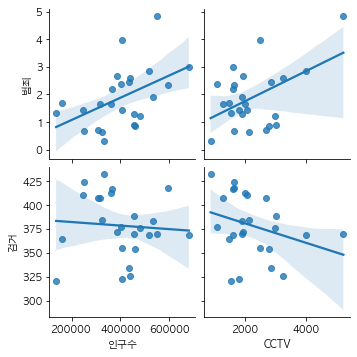

In [168]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수', 'CCTV'],
    y_vars=['범죄', '검거'],
    kind='reg'
)

### 인구수, CCTV와 살인검거율, 폭력검거율 관계

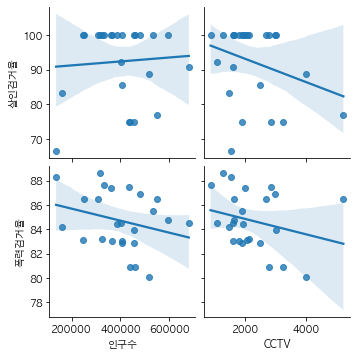

In [169]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수', 'CCTV'],
    y_vars=['살인검거율', '폭력검거율'],
    kind='reg'
)

- 인구수가 많아질 수록 폭력검거율은 떨어지는 경향을 보인다.
- 인구수가 증가하면 살인 검거율은 미약하게 증가하는 것으로 보이나 증가량이 미미해 보인다.
- 검거율이 낮은 지역일 수록 CCTV가 많이 설치되는 것으로 보인다.

---
### heatmap을 이용한 전체 검거율 확인

In [170]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,432.593167
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,423.928929
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,417.767372
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,416.915211
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,412.885306


<AxesSubplot:ylabel='구별'>

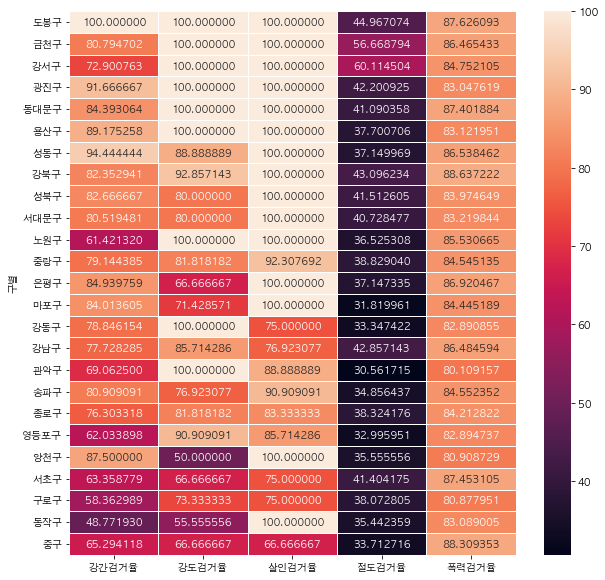

In [171]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

plt.figure(figsize=(10, 10))

# heatmap
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True,
    fmt = 'f',
    linewidths=0.5,
)

> 절도검거율이 다른 검거율에 비해 매우 저조하다.   
> 검거율이 우수한 지역은 도봉구, 금천구, 강서구

### heatmap을 이용한 범죄 발생율 확인

<AxesSubplot:ylabel='구별'>

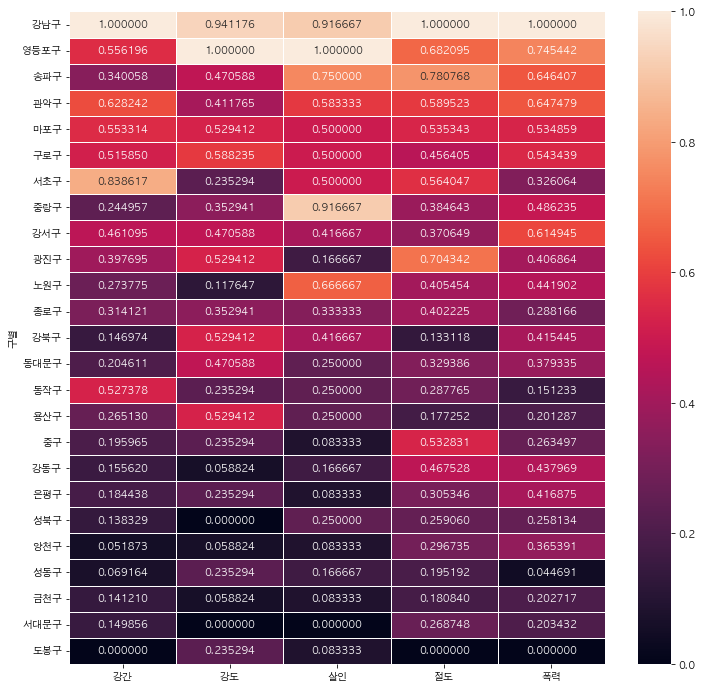

In [172]:
target_col = ['강간', '강도', '살인', '절도', '폭력']

# sort
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

# size
plt.figure(figsize=(12, 12))

# heatmap
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True,
    fmt = 'f',
    linewidths=0.5,
)

# 지도출력

In [173]:
import json
import folium

In [174]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = open(geo_path, encoding='utf-8').read()
geo_json = json.loads(geo_str)


In [184]:
# 살인 건수를 서울시 지도에 출력
amount_crime = crime_anal_norm['살인']

# 지도에 amount_crime 표시
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 지도에 amount_crime 구역
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=amount_crime,
    columns=['시도명', '살인'],
    fill_color='PuRd',
    fill_opacity=0.7,
    key_on='feature.id',
).add_to(map)

map


# 인구대비 범죄율 지도 출력

In [187]:
# 인구 대비 범죄율 컬럼 추가
crime_anal_norm['인구대비범죄율'] = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 100000

In [188]:
# 지도에 amount_crime 표시
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 지도에 amount_crime 구역
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=crime_anal_norm['인구대비범죄율'],
    columns=['시도명', '인구대비범죄율'],
    fill_color='PuRd',
    fill_opacity=0.7,
    key_on='feature.id',
).add_to(map)

map